In [3]:
# Batch convert DTM and satellite TIFFs to PNG dataset structure for CMX MVP.
%run ./scripts/batch_convert.py --dtm_dir ../data/raw/dtm --sat_dir ../data/raw/satellite --out ../datasets/HillfortMVP --method minmax --write_test

SAT: 100%|██████████| 1/1 [00:25<00:00, 25.72s/it]

Processed 1 tiles. Dataset saved to ..\datasets\HillfortMVP


In [1]:
# Rasterize polygons into binary mask PNGs aligned to reference rasters.
%run ./scripts/rasterize_polygons.py --geom ../data/raw/inspire/PS_ProtectedSite_malestisedPolygon.shp --ref_dir ../data/raw/dtm --map_numbers ../data/linnamagede_ruudunumbrid_v2.csv --out ../datasets/HillfortMVP/Label

Rasterizing: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


In [ ]:
# Check if rasterized masks exist and are valid.
%run ./scripts/check_mask.py ../datasets/HillfortMVP/Label/62093.png

File: ..\datasets\HillfortMVP\Label\62093.png
Total pixels: 25000000
Non-zero pixels: 76232 (0.304928%)
Value counts: {0: 24923768, 255: 76232}


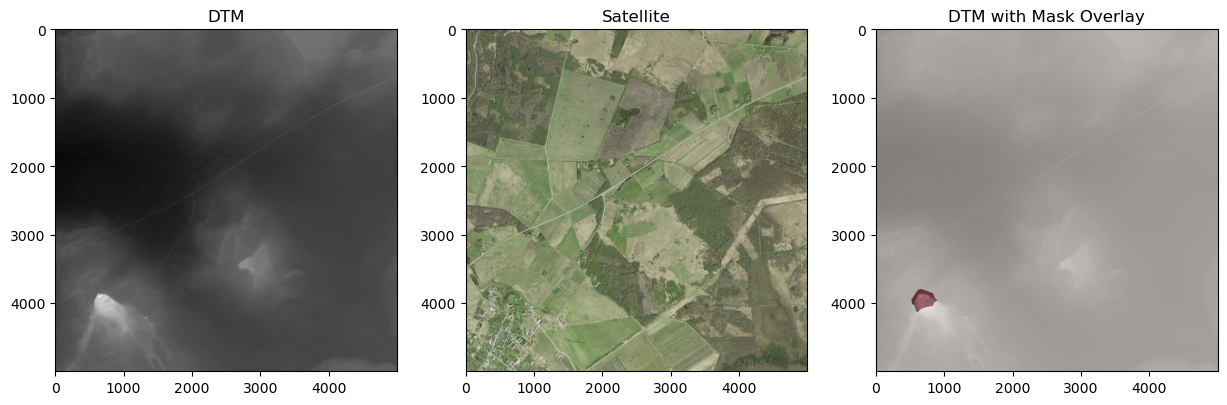

In [ ]:
# Visualise DTM and satellite images and DTM with mask overlay.
import matplotlib.pyplot as plt
from PIL import Image

mask_path = "../datasets/HillfortMVP/Label/62093.png"
dtm_path = "../datasets/HillfortMVP/DTM/62093.png"
sat_path = "../datasets/HillfortMVP/RGB/62093.png"

mask = Image.open(mask_path)
dtm = Image.open(dtm_path)
sat = Image.open(sat_path)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(dtm, cmap="gray")
axs[0].set_title("DTM")
axs[1].imshow(sat)
axs[1].set_title("Satellite")
axs[2].imshow(dtm, cmap="gray")
axs[2].imshow(mask, alpha=0.5, cmap="Reds")
axs[2].set_title("DTM with Mask Overlay")
plt.show()